# 1-Dimension Dynamic Programming

DP is basically an optimized version of recursion. it tackles a big problem by breaking down into smaller subproblems, usually more time and space efficient.

## Recursion

Recursive solution of Fibonacci sequence $F(n)=F(n-1)+F(n-2)$

```python
def bruteForce(n):
    if n <= 1:
        return n
    return bruteForce(n - 1) + bruteForce(n - 2)
```

Time complexity is $O(2^n)$ because at each call, `bruteForce` creates approximately 2 more calls

## DP Vs Recursion

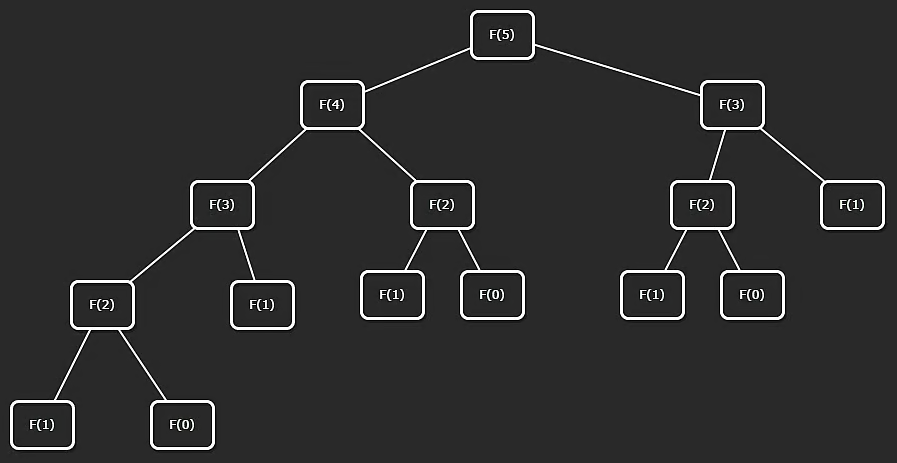

We can see we calculate `F(2)` three times, which is extra unneccessary work. This grows exponentially with our data.

DP avoids this unnecessary computation by using `memoization`, which is basically fancy `caching` (storing data for future use)
- once we perform a computation, if we're gonna reuse the results, then we store them in a hashmap/array and retrieve it when we need to do the same computation
- *Top Down DP* is basically *recursion + memoization*

In [7]:
def memoization(n, cache):
    if n <= 1:
        return n
    if n in cache:
        return cache[n]

    #cache gets passed around 
    #key is the index and the value is the fiboinacci number itself
    #this hashmap allows us to retrieve in O(1) time
    cache[n] = memoization(n - 1,cache) + memoization(n - 2,cache)
    return cache[n]

print(memoization(6,{}))


8


1. Added a `cache` hash map
2. Added base case to check if the value of `n` is in the index - removes unneccessary computations
3. As calculating the value of a specific `F(n)`, we store it in a cache for retrieval later

## Top Down DP (Memoization)

This recursion + memoization is the *top down* approach because we start from the root node (top) and calculate down to the smallest cases, then return all the way up.

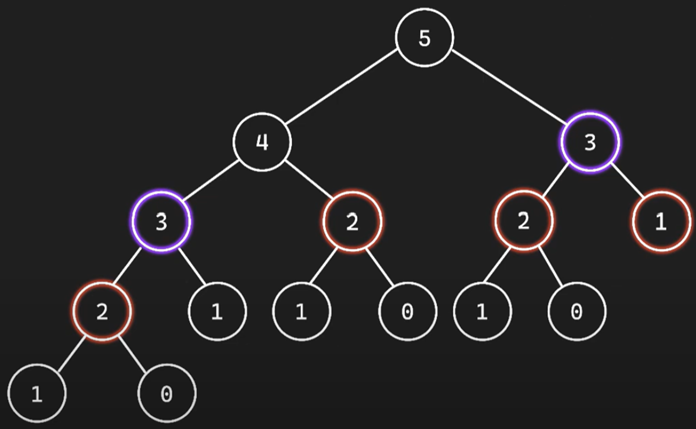

The time complexity is $O(n)$ (assuming retrieval is $O(1)$) because we only ever calculate the fibonacci number **once** and store it in the cache. Space complexity is also $O(n)$ since we store the number in the cache.

## Bottom Up DP (Tabulation)

Since we calculate $F(n)$ by making use of $F(n-1)$ and $F(n-2)$, we can simply use an array of size $n$ and iterate over the numbers one by one. We store the $F(i)$ in the `ith` index of the array

```python
#this stores the ith fibonacci numbers 0,1,2,3,4,5 respectively
[0,1,1,2,3,5]
```

The time and space complexity are both $O(n)$. But do we need to allocate space for the entire array?
- We are only ever using 2 values to calculate the next value!
- We can simply have an array of size 2 and use this
  - This will make space complexity $O(1)$

In [23]:
def tabulation(n):
    if n < 2:
        return n

    dp = [0, 1]
    i = 2
    while i <=n:
        tmp = dp[1]
        #overwrite the second number to store the new fib number
        dp[1] = dp[0] + dp[1]
        #shift the old second number to the new first number
        dp[0] = tmp
        i += 1
    return dp[1]


In [24]:
print(tabulation(5))

5


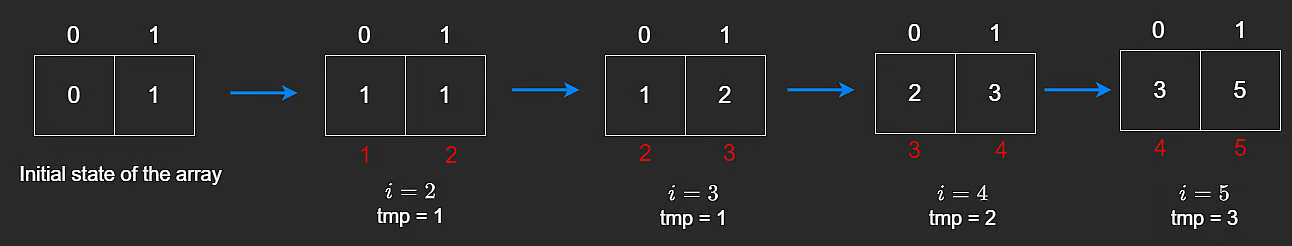

- `i` stores which fib number we are currently at
- `dp[1]` will always store the next fib number

## 1D problem

This is a 1D problem because we only need one parameter `n` to specify the subproblem, and a 1D array to store our results.

---

## Problem: Counting Stairs

You are given an integer n representing the number of steps to reach the top of a staircase. You can climb with either 1 or 2 steps at a time.

Return the number of distinct ways to climb to the top of the staircase.

```
Input: n = 3

Output: 3

Explanation: 1+1+1,1+2,2+1
```

Bottom Up DP

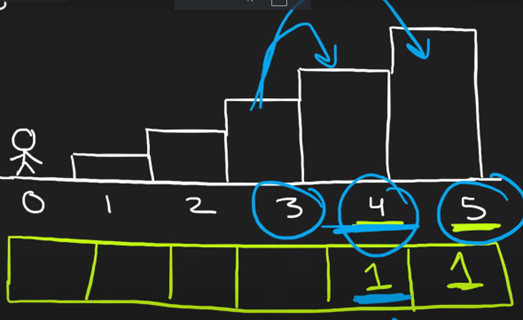

Our goal is to get from `0` to `n`
- Suppose we are at `i`. There is `g` ways to get to `n`
- Suppose we are at `i-1`. There is `h` ways to get to `n`
- Suppose we are at `i-2`. There is one way to get to `i-1` and one way to get to `i-2`. Therefore we simply add up the num ways from `i` and from `i-1` respectively, which is why Fibonacci `g+h`

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        #we wanna go from index 0 to index n
        if n <= 3:
            return n
        n1, n2 = 2, 3

        #go from index 4
        for i in range(4, n + 1):
            temp = n1 + n2
            #we always maintain n1,n2
            #this shifts the pair (n1,n2) forward
            n1 = n2
            n2 = temp
        return n2

## Problem: House Robber

You are given an integer array nums where `nums[i]` represents the amount of money the ith house has. The houses are arranged in a straight line, i.e. the `i`th house is the neighbor of the `(i-1)`th and `(i+1)`th house.

You are planning to rob money from the houses, but you cannot rob two adjacent houses because the security system will automatically alert the police if two adjacent houses were both broken into.

Return the maximum amount of money you can rob without alerting the police.

In [39]:
#this recursive code works but is way too slow lol

#need to somehow remove cs
class Solution:
    def rob(self, nums: List[int]) -> int:
        def travel(i,cs,nums):

            if i>=len(nums):
                #update global max
                return cs
            cs+=nums[i]
            return max(travel(i+2,cs,nums),travel(i+3,cs,nums))

        return max(travel(0,0,nums),
                    travel(1,0,nums))

0 0
2 2
4 10
end result is 16
end result is 16
end result is 10
3 2
end result is 5
end result is 5
16


In [42]:
#my solution with caching!!
def rob(nums):
    def travel(i,nums,cache):

        if i>=len(nums):
            return 0
        elif i in cache:
            return cache[i]
        
        cache[i]=max(travel(i+2,nums,cache),travel(i+3,nums,cache)) + nums[i]
        return cache[i]

    return max(travel(0,nums,{}),
                travel(1,nums,{}))

print(rob([2,9,8,3,6]))
            

16


We can break up this problem into subproblems, that is recursive in nature.

Suppose we have a function called `rob` that gives the maximum amount of money for houses of index `0` to `i-2`. Then, the maximum amount for houses `0` to `i` is then 
```python
rob(arr[0:i]) = max(
    #select this house and skip the prev one
    arr[i] + rob(arr[0:i-1]),
    #just take teh first elem up to the prev one
    rob(arr[0:i])
    )
```

Now suppose we had an array `rob`, where index `i` gives the maximum amt you can rob from index `0` to `i`. Then,
```python
rob[i]=max(
    #dont take the prev elem
    arr[i] + rob[i-2],
    rob[i-1]
)
```

Note that to compute `rob[i]`, we only need `rob[i-2]` and `rob[i-1]`! Only need the previous 2 values. This solution is so CLEAN AND NEAT

In [ ]:
#their sol WTF
class Solution:
    def rob(self, nums: List[int]) -> int:
        rob = [0,0]

        #n iterates over the list
        for n in nums:
            #rob2 was up till the last house we robbed, thats why rob2=temp
            #rob1 was up till the last last house we robbed, thats why rob1=rob2
            temp = max(
                #theres a gap where we take current and prev prev house
                n + rob[0],
                #ignore the current house, go to the next
                rob[1])
            rob[0]=rob[1]
            rob[1] = temp
        return rob[1]
